In [1]:
import glob # to load data
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms # normalize image
from torch.optim import SGD, Adam # optimizer
from torch.utils.data import DataLoader # Load custom dataset
from torch.nn import CrossEntropyLoss # loss function


# My Modules
from model import Net # custom mlp net
from dataset import Cifar10, concatenate, class_count, to_image_array # custom dataset and methods

# metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix


In [2]:
def hist_plot(hist):
    fig = plt.figure(121, figsize=(15, 5))
    ax0 = fig.add_subplot(121)
    ax0.plot(hist[0])
    ax0.set_xlabel("Epochs")
    ax0.set_ylabel("Cross Entropy Loss")

    ax1 = fig.add_subplot(122)
    ax1.plot(hist[1])
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")

def batch_inverse_normalize(x, mean, std):
    # represent mean and std to 1, C, 1, ... tensors for broadcasting
    reshape_shape = [1, -1] + ([1] * (len(x.shape) - 2))
    mean = torch.tensor(mean, device=x.device, dtype=x.dtype).reshape(*reshape_shape)
    std = torch.tensor(std, device=x.device, dtype=x.dtype).reshape(*reshape_shape)
    return x * std + mean

def metrics(model):
    classes = testdata.classes
    y_pred, y_true = model.predict(testloader)
    precision, recall, fscore, _ = score(testdata.labels, list(y_pred))
    cm = confusion_matrix(testdata.labels, y_pred)

    # plot
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.matshow(cm, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
    plt.ylabel('Actual Category')
    plt.yticks(range(10), classes)
    plt.xlabel('Predicted Category')
    plt.xticks(range(10), classes)
    plt.show()

    # table heading
    print('{0:2s} - {1:10s} - {2:4s} - {3:4s} - {4:4s}'
    .format('Label', 'Category', 'Precision', 'Recall', 'f1-Score'))
    for label, category in enumerate(tuningdata.classes):
        print("{0:2d} - {1:10s} - {2:4f} - {3:4f} - {4:4f}"
        .format(label, category , round(precision[label], 4), round(recall[label], 3), round(fscore[label], 3)))


    print('\nConfusionMatrix\n',cm)

In [3]:
# hyper parameters and configurations
EPOCHS = 100
MOMENTUM = 0.9
BATCH_SIZE = 5
LEARNING_RATE = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device :", device)


device : cuda


In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(), # transform array to pytorch tensor
        transforms.Normalize((0.5, 0.5, 0.5), # normlize mean for (R, G, B)
                            (0.5, 0.5, 0.5)) # normlize std for (R, G, B)
    ])

In [5]:
# Load data_batch_1
tuningdata = Cifar10("cifar-10-batches-py/data_batch_1", transform)
tuningloader = DataLoader(tuningdata, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# Load test_batch
testdata = Cifar10("cifar-10-batches-py/test_batch", transform)
testloader = DataLoader(testdata, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [6]:
class_count(tuningdata)

{'frog': 1030,
 'truck': 981,
 'deer': 999,
 'automobile': 974,
 'bird': 1032,
 'horse': 1001,
 'ship': 1025,
 'cat': 1016,
 'dog': 937,
 'airplane': 1005}

<h1>
    Tuning Model
</h1>
<h3>
    train using batch number 1 include 10,000 image data with labels
</h3>

In [7]:
# create and config tuning model

tuning_model = Net()
criterion = CrossEntropyLoss()
optimizer = SGD(tuning_model.parameters(),
                lr=LEARNING_RATE,
                momentum=0.9)
tuning_model.to(device)

# list of loss and accuracy
hist = [[], []]

epoch: 1    | loss: 2.261  | accuracy: 18.99
epoch: 2    | loss: 2.211  | accuracy: 23.71
epoch: 3    | loss: 2.192  | accuracy: 25.77
epoch: 4    | loss: 2.183  | accuracy: 27.25
epoch: 5    | loss: 2.17   | accuracy: 28.73
epoch: 6    | loss: 2.158  | accuracy: 29.74
epoch: 7    | loss: 2.151  | accuracy: 30.62
epoch: 8    | loss: 2.143  | accuracy: 31.39
epoch: 9    | loss: 2.133  | accuracy: 32.39
epoch: 10   | loss: 2.133  | accuracy: 32.28
epoch: 11   | loss: 2.131  | accuracy: 32.75
epoch: 12   | loss: 2.126  | accuracy: 32.57
epoch: 13   | loss: 2.124  | accuracy: 33.19
epoch: 14   | loss: 2.116  | accuracy: 34.12
epoch: 15   | loss: 2.111  | accuracy: 34.87
epoch: 16   | loss: 2.11   | accuracy: 34.43
epoch: 17   | loss: 2.109  | accuracy: 34.77
epoch: 18   | loss: 2.105  | accuracy: 35.18
epoch: 19   | loss: 2.104  | accuracy: 35.43
epoch: 20   | loss: 2.102  | accuracy: 35.21
epoch: 21   | loss: 2.097  | accuracy: 35.84
epoch: 22   | loss: 2.1    | accuracy: 35.79
epoch: 23 

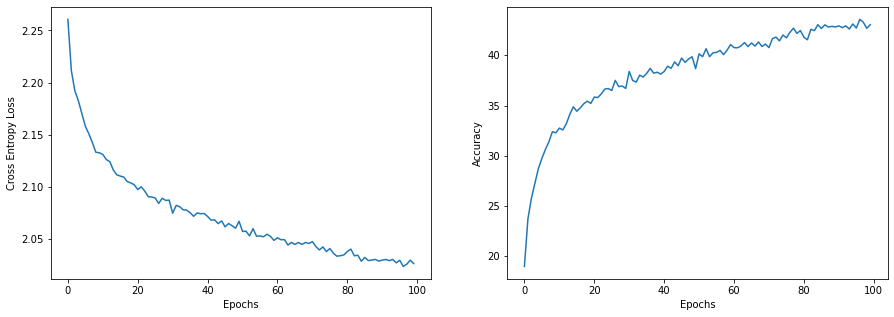

In [8]:
res = []
res += tuning_model.train(tuningloader, optimizer, criterion, epochs=EPOCHS)

# save older results
hist[0] += res[0]
hist[1] += res[1]
hist_plot(hist)

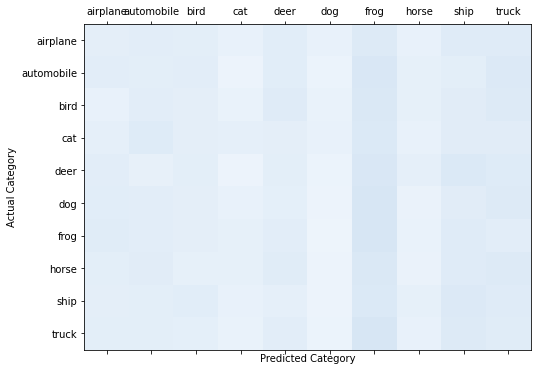

Label - Category   - Precision - Recall - f1-Score
 0 - airplane   - 0.097900 - 0.097000 - 0.097000
 1 - automobile - 0.098100 - 0.101000 - 0.100000
 2 - bird       - 0.097800 - 0.094000 - 0.096000
 3 - cat        - 0.119800 - 0.087000 - 0.101000
 4 - deer       - 0.098000 - 0.101000 - 0.099000
 5 - dog        - 0.094600 - 0.058000 - 0.072000
 6 - frog       - 0.106600 - 0.158000 - 0.127000
 7 - horse      - 0.084200 - 0.064000 - 0.073000
 8 - ship       - 0.113400 - 0.136000 - 0.124000
 9 - truck      - 0.094400 - 0.114000 - 0.103000

ConfusionMatrix
 [[ 97 104 100  72 107  76 132  71 120 121]
 [105 101 103  56 108  59 150  85 100 133]
 [ 76 102  94  67 119  69 147  85 112 129]
 [ 89 124  95  87  95  75 137  77 111 110]
 [104  82 100  56 101  59 151  86 138 123]
 [108 102  95  76  90  58 164  66 113 128]
 [117 104  94  84 104  47 158  69 120 103]
 [101 110  84  83 115  56 144  64 118 125]
 [ 95 101 106  76  87  55 139  84 136 121]
 [ 99 100  90  69 105  59 160  73 131 114]]


In [9]:
metrics(tuning_model)

In [10]:
# concatenate all batch data
batches_list = []
for batch_data in glob.glob("cifar-10-batches-py/data_batch_*"):
    batches_list.append(Cifar10(batch_data, transform))
batches_list

traindata = concatenate(batches_list)
trainloader = DataLoader(traindata, batch_size=10, shuffle=True, num_workers=2)


<h1>
    Main Model
</h1>
<h3>
    train using All data include 50,000 image data with labels
</h3>

In [11]:
model = Net()
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
model.to(device)
model_hist = [[], []]

epoch: 1    | loss: 2.211  | accuracy: 24.25
epoch: 2    | loss: 2.161  | accuracy: 29.38
epoch: 3    | loss: 2.136  | accuracy: 32.06
epoch: 4    | loss: 2.116  | accuracy: 34.44
epoch: 5    | loss: 2.097  | accuracy: 36.26
epoch: 6    | loss: 2.086  | accuracy: 37.3
epoch: 7    | loss: 2.076  | accuracy: 38.37
epoch: 8    | loss: 2.07   | accuracy: 38.83
epoch: 9    | loss: 2.06   | accuracy: 39.91
epoch: 10   | loss: 2.057  | accuracy: 40.1
epoch: 11   | loss: 2.051  | accuracy: 40.66
epoch: 12   | loss: 2.047  | accuracy: 41.15
epoch: 13   | loss: 2.044  | accuracy: 41.51
epoch: 14   | loss: 2.04   | accuracy: 41.94
epoch: 15   | loss: 2.038  | accuracy: 42.02
epoch: 16   | loss: 2.031  | accuracy: 42.81
epoch: 17   | loss: 2.027  | accuracy: 43.15
epoch: 18   | loss: 2.026  | accuracy: 43.33
epoch: 19   | loss: 2.027  | accuracy: 43.23
epoch: 20   | loss: 2.019  | accuracy: 43.88
epoch: 21   | loss: 2.017  | accuracy: 44.05
epoch: 22   | loss: 2.015  | accuracy: 44.4
epoch: 23   |

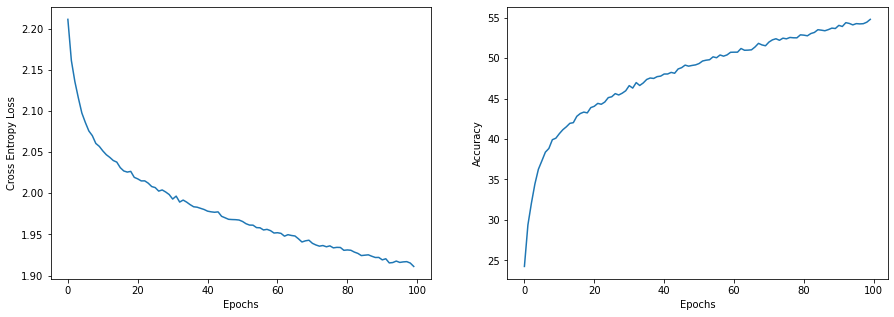

In [12]:
res = []
res += model.train(trainloader, optimizer, criterion, epochs=EPOCHS)

# save older results
model_hist[0] += res[0]
model_hist[1] += res[1]
hist_plot(model_hist)

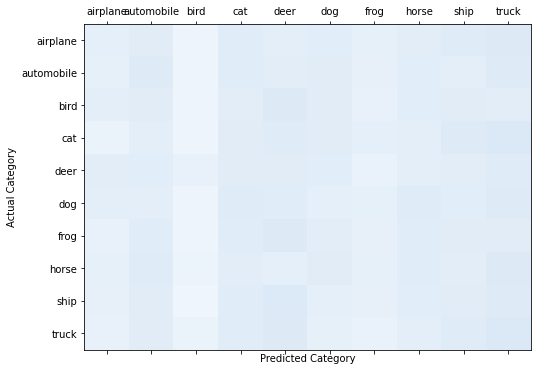

Label - Category   - Precision - Recall - f1-Score
 0 - airplane   - 0.106600 - 0.091000 - 0.098000
 1 - automobile - 0.111600 - 0.124000 - 0.117000
 2 - bird       - 0.090900 - 0.048000 - 0.063000
 3 - cat        - 0.099400 - 0.112000 - 0.105000
 4 - deer       - 0.096400 - 0.111000 - 0.103000
 5 - dog        - 0.089300 - 0.092000 - 0.091000
 6 - frog       - 0.101100 - 0.080000 - 0.089000
 7 - horse      - 0.109200 - 0.116000 - 0.113000
 8 - ship       - 0.101300 - 0.112000 - 0.106000
 9 - truck      - 0.110600 - 0.137000 - 0.122000

ConfusionMatrix
 [[ 91 111  47 115  94 106  85 102 118 131]
 [ 83 124  48 115 104 113  82 108  99 124]
 [ 97 113  48 105 131 113  73 106 110 104]
 [ 66 101  50 112 118 110  86  96 124 137]
 [104 109  71 112 111 108  68  95 104 118]
 [ 97  96  47 121 114  92  83 119 108 123]
 [ 74 115  50 115 127 102  80 114 111 112]
 [ 84 120  59 102  93 112  83 116 102 129]
 [ 80 111  45 115 135  90  82 106 112 124]
 [ 78 111  63 115 125  84  69 100 118 137]]


In [13]:
metrics(model)

In [17]:
model.score(testloader)

Accuracy of the network on the 10000 test images: 38 %


In [18]:
current_path = !pwd
filename = "/cifar10_model"
current_path[0] += filename
current_path[0]

'/home/mohammad/Desktop/Desktop/aimedic/project2_MohammadRezaei/cifar10_model'

In [19]:
torch.save(model.state_dict(), current_path[0])